<a href="https://colab.research.google.com/github/hadil56165M/hadil56165M/blob/main/test_technique_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
"""TASK 1 - XGBoost pour prédire les défauts de paiement.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1YOUR_DRIVE_LINK
"""

# Étape 1 : Importer les librairies
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder
from google.colab import drive

# Étape 2 : Monter Google Drive et charger les données
drive.mount('/content/drive')

# Télécharger le dataset original depuis UCI si nécessaire
!wget -N https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls

# Charger les données
try:
    data = pd.read_excel('default of credit card clients.xls', header=1)
    print("Dataset chargé depuis UCI avec succès!")
except:
    print("Échec du téléchargement, utilisation du fichier Drive")
    data = pd.read_excel('/content/drive/MyDrive/default_of_credit_card_clients.xls', header=1)

# Étape 3 : Prétraitement des données
print("\nColonnes disponibles:", data.columns.tolist())

# Vérification du nom de la colonne cible
target_col = 'default payment next month'  # Nom original
if target_col not in data.columns:
    target_col = 'DEFAULT_PAYMENT_NEXT_MONTH'  # Variante courante

# Conversion des types de données
for col in data.select_dtypes(include=['object']).columns:
    try:
        data[col] = pd.to_numeric(data[col], errors='raise')
    except:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))

# Gestion des valeurs manquantes
data.fillna(data.mean(), inplace=True)

# Séparation features/target
X = data.drop(target_col, axis=1)
y = data[target_col]

# Étape 4 : Entraînement du modèle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    eval_metric='logloss',
    use_label_encoder=False
)

model.fit(X_train, y_train)

# Étape 5 : Évaluation
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\nPerformance du modèle:")
print(f"- AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
print(f"- F1 Score: {f1_score(y_test, y_pred):.4f}")

# Étape 6 : Importance des features
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 des features importantes:")
print(importance.head(10))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2025-04-24 18:32:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘default of credit card clients.xls’

default of credit c     [ <=>                ]   5.28M  --.-KB/s    in 0.1s    

Last-modified header missing -- time-stamps turned off.
2025-04-24 18:32:11 (53.7 MB/s) - ‘default of credit card clients.xls’ saved [5539328]

Dataset chargé depuis UCI avec succès!

Colonnes disponibles: ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5'

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:32:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Performance du modèle:
- AUC Score: 0.7845
- F1 Score: 0.4607

Top 10 des features importantes:
     Feature  Importance
6      PAY_0    0.425203
7      PAY_2    0.099409
8      PAY_3    0.068786
9      PAY_4    0.056516
11     PAY_6    0.039415
10     PAY_5    0.036675
20  PAY_AMT3    0.032430
18  PAY_AMT1    0.027264
19  PAY_AMT2    0.026637
21  PAY_AMT4    0.024301


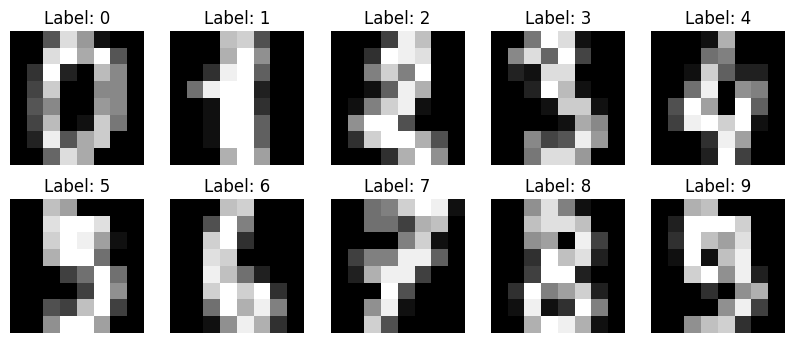

Nombre de composantes après PCA : 40

Entraînement avec kernel linear...
Accuracy: 0.9694
Temps d'entraînement: 0.12s

Entraînement avec kernel rbf...
Accuracy: 0.9806
Temps d'entraînement: 0.16s

Entraînement avec kernel poly...
Accuracy: 0.9639
Temps d'entraînement: 0.22s


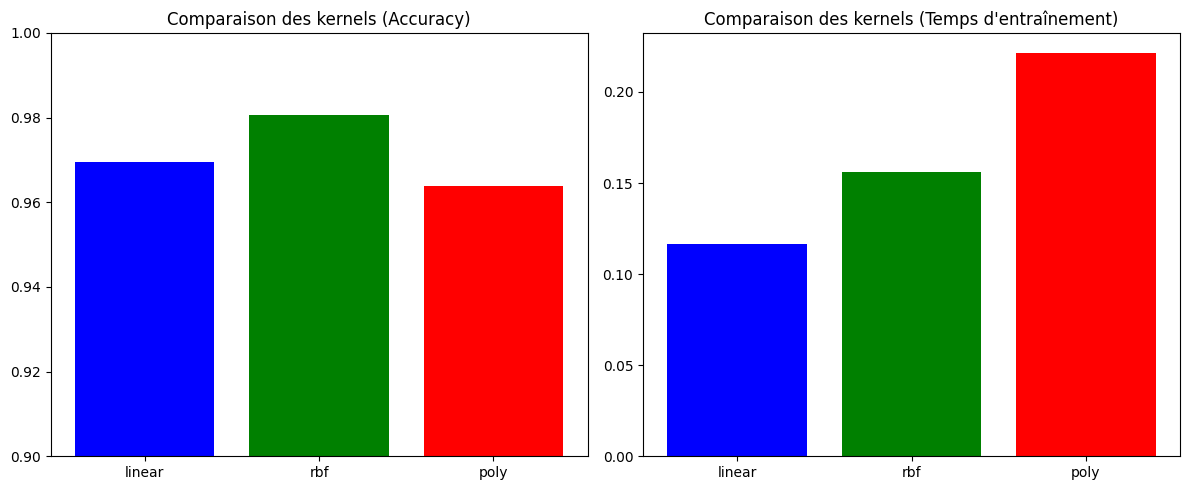


Nombre total d'erreurs (rbf kernel): 7/1797


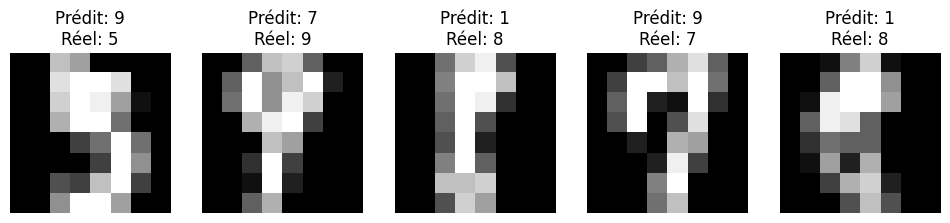

In [ ]:
# -*- coding: utf-8 -*-
"""TASK 2 - SVM pour la classification de chiffres manuscrits.ipynb

Automatically generated by Colaboratory.
"""

# Étape 1 : Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time

# Étape 2 : Charger le dataset MNIST
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Visualisation des données
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i].reshape(8,8), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.show()

# Étape 3 : Prétraitement
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réduction de dimension avec PCA
pca = PCA(n_components=0.95)  # Conserve 95% de la variance
X_pca = pca.fit_transform(X_scaled)
print(f"Nombre de composantes après PCA : {pca.n_components_}")

# Étape 4 : Comparaison des kernels SVM
kernels = ['linear', 'rbf', 'poly']
results = {}

for kernel in kernels:
    print(f"\nEntraînement avec kernel {kernel}...")
    start_time = time.time()

    model = svm.SVC(
        kernel=kernel,
        gamma='scale',
        C=1.0,
        random_state=42
    )

    # Split train/test
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Entraînement
    model.fit(X_train, y_train)

    # Prédiction
    y_pred = model.predict(X_test)

    # Calcul des métriques
    train_time = time.time() - start_time
    accuracy = accuracy_score(y_test, y_pred)

    results[kernel] = {
        'accuracy': accuracy,
        'time': train_time
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Temps d'entraînement: {train_time:.2f}s")

# Étape 5 : Visualisation des résultats
plt.figure(figsize=(12,5))

# Graphique de précision
plt.subplot(1, 2, 1)
plt.bar(results.keys(), [res['accuracy'] for res in results.values()], color=['blue', 'green', 'red'])
plt.title('Comparaison des kernels (Accuracy)')
plt.ylim(0.9, 1.0)

# Graphique de temps d'exécution
plt.subplot(1, 2, 2)
plt.bar(results.keys(), [res['time'] for res in results.values()], color=['blue', 'green', 'red'])
plt.title('Comparaison des kernels (Temps d\'entraînement)')

plt.tight_layout()
plt.show()

# Étape 6 : Visualisation des erreurs (pour le meilleur modèle)
best_kernel = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
model = svm.SVC(kernel=best_kernel, gamma='scale', C=1.0).fit(X_pca, y)
y_pred = model.predict(X_pca)

# Trouver les erreurs de prédiction
errors = np.where(y != y_pred)[0]
print(f"\nNombre total d'erreurs ({best_kernel} kernel): {len(errors)}/{len(y)}")

# Afficher quelques erreurs
plt.figure(figsize=(12,4))
for i in range(min(5, len(errors))):
    idx = errors[i]
    plt.subplot(1, 5, i+1)
    plt.imshow(X[idx].reshape(8,8), cmap='gray')
    plt.title(f"Prédit: {y_pred[idx]}\nRéel: {y[idx]}")
    plt.axis('off')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2025-04-24 18:44:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘Online Retail.xlsx’

Online Retail.xlsx      [  <=>               ]  22.62M  73.9MB/s    in 0.3s    

Last-modified header missing -- time-stamps turned off.
2025-04-24 18:44:30 (73.9 MB/s) - ‘Online Retail.xlsx’ saved [23715344]

Dataset chargé depuis UCI avec succès!

Shape du dataset : (541909, 8)

Aperçu des données :


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


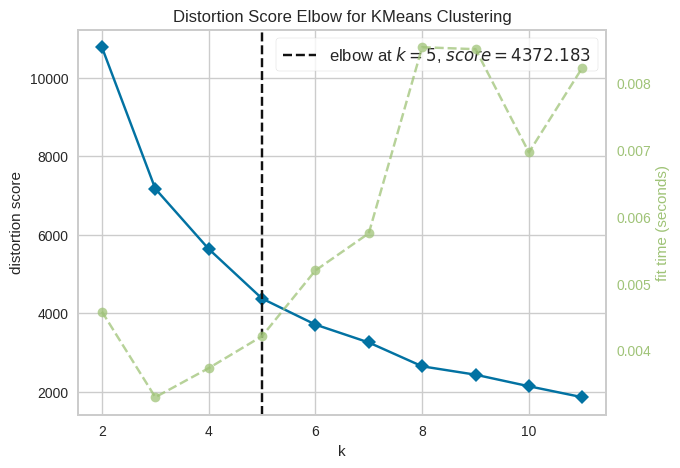

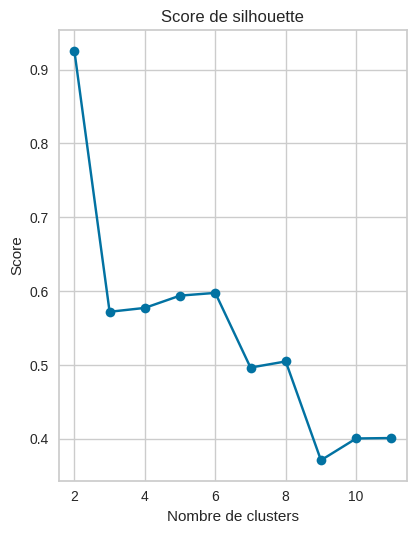


Statistiques par cluster :


,PurchaseFrequency,MonetaryValue,TotalItems,Recency
Cluster,,,,
0,4.686220,1879.411047,1106.824643,4925.692737
1,1.579817,560.012441,285.353211,5130.639450
2,71.857143,57987.181429,38151.666667,4905.380952
3,40.400000,205560.228000,97880.600000,4891.600000


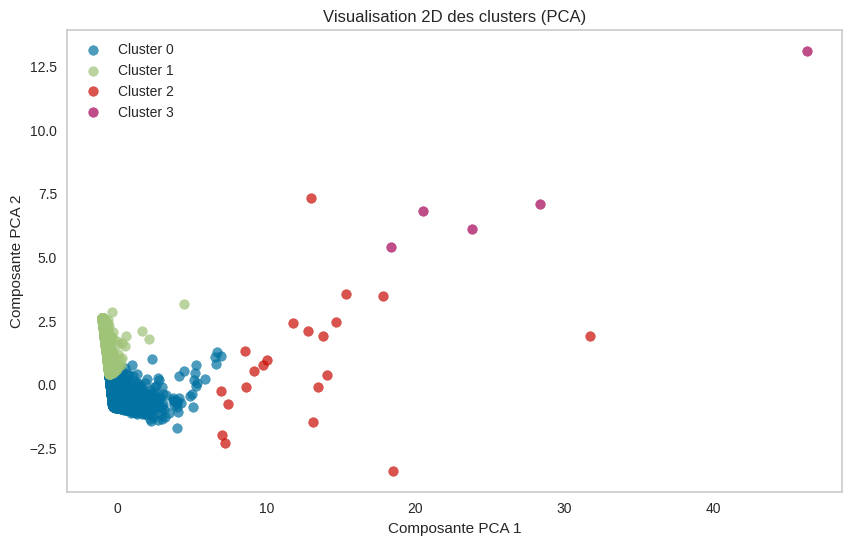


Profil des clusters :

Cluster 0: Clients occasionnels (faible fréquence, faible valeur)


,0
PurchaseFrequency,4.686220
MonetaryValue,1879.411047
TotalItems,1106.824643
Recency,4925.692737



Cluster 1: Clients fidèles (fréquence élevée, valeur moyenne)


,1
PurchaseFrequency,1.579817
MonetaryValue,560.012441
TotalItems,285.353211
Recency,5130.639450



Cluster 2: Gros acheteurs (valeur élevée)


,2
PurchaseFrequency,71.857143
MonetaryValue,57987.181429
TotalItems,38151.666667
Recency,4905.380952



Cluster 3: Clients récents (recency faible)


,3
PurchaseFrequency,40.400
MonetaryValue,205560.228
TotalItems,97880.600
Recency,4891.600


In [ ]:
# -*- coding: utf-8 -*-
"""TASK 3 - KMeans pour regrouper des clients en profils.ipynb

Automatically generated by Colaboratory.
"""

# Étape 1 : Importer les librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from datetime import datetime
from google.colab import drive

# Étape 2 : Charger les données
drive.mount('/content/drive')

# Télécharger le dataset depuis UCI
!wget -N https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

# Charger les données
try:
    df = pd.read_excel('Online Retail.xlsx')
    print("Dataset chargé depuis UCI avec succès!")
except:
    print("Échec du téléchargement, utilisation du fichier Drive")
    df = pd.read_excel('/content/drive/MyDrive/Online_Retail.xlsx')

# Aperçu des données
print(f"\nShape du dataset : {df.shape}")
print("\nAperçu des données :")
display(df.head())

# Étape 3 : Prétraitement des données
# Nettoyage des données
df = df[df['Quantity'] > 0]  # Supprimer les retours
df = df[df['UnitPrice'] > 0]
df.dropna(subset=['CustomerID'], inplace=True)

# Feature Engineering
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Création des features clients
customer_features = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Fréquence d'achat
    'TotalAmount': 'sum',    # Valeur totale
    'Quantity': 'sum',       # Volume total
    'InvoiceDate': lambda x: (datetime.now() - x.max()).days  # Dernier achat
}).rename(columns={
    'InvoiceNo': 'PurchaseFrequency',
    'TotalAmount': 'MonetaryValue',
    'Quantity': 'TotalItems',
    'InvoiceDate': 'Recency'
})

# Normalisation des données
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features)

# Étape 4 : Détermination du nombre optimal de clusters
plt.figure(figsize=(15,5))

# Méthode du coude
plt.subplot(1, 2, 1)
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2,12))
visualizer.fit(scaled_features)
visualizer.show()

# Score de silhouette
plt.subplot(1, 2, 2)
silhouette_scores = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)
plt.plot(range(2,12), silhouette_scores, marker='o')
plt.title('Score de silhouette')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

# Choix du nombre de clusters (ex: 4)
optimal_clusters = 4

# Étape 5 : Clustering avec KMeans
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
customer_features['Cluster'] = clusters

# Étape 6 : Analyse des clusters
cluster_stats = customer_features.groupby('Cluster').mean()
print("\nStatistiques par cluster :")
display(cluster_stats)

# Visualisation avec PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)
customer_features['PCA1'] = reduced_data[:,0]
customer_features['PCA2'] = reduced_data[:,1]

plt.figure(figsize=(10,6))
for cluster in sorted(customer_features['Cluster'].unique()):
    cluster_data = customer_features[customer_features['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'],
                label=f'Cluster {cluster}', alpha=0.7)

plt.title('Visualisation 2D des clusters (PCA)')
plt.xlabel('Composante PCA 1')
plt.ylabel('Composante PCA 2')
plt.legend()
plt.grid()
plt.show()

# Étape 7 : Profilage des clusters
cluster_profiles = customer_features.groupby('Cluster').mean()

# Interprétation
print("\nProfil des clusters :")
profiles = {
    0: "Clients occasionnels (faible fréquence, faible valeur)",
    1: "Clients fidèles (fréquence élevée, valeur moyenne)",
    2: "Gros acheteurs (valeur élevée)",
    3: "Clients récents (recency faible)"
}

for cluster, description in profiles.items():
    print(f"\nCluster {cluster}: {description}")
    display(cluster_stats.loc[cluster])